We use discretization for a cos potential, and take automatic differentiation with respect to input.

The Hamiltonian is

$$H = -\frac{1}{2m}\frac{d^2}{d\phi^2}+E_J \cos(\phi)$$

We discretize the space, calculate the lowest eigenenergies and define

$\Delta E=E_1 - E_0$

Finally we fetch $\frac{\partial \Delta E}{\partial E_j}$ through automatic differentiation.

In [2]:
import numpy as np
import jax
from matplotlib import pyplot as plt
import scipy.sparse as sps
from discretization_attempts.dom import DOM
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax.experimental import sparse
key = random.PRNGKey(0)
import xitorch

In [ ]:
import torch
from jax import grad
import jax.numpy as jnp


# Create a PyTorch tensor
torch_tensor = torch.tensor([1, 2, 3, 4, 5.])

# Convert PyTorch tensor to JAX array
jax_array = jnp.array(torch_tensor.numpy())

print(jax_array)


In [3]:
# input parameters

num_dscr = 1000  # discretization number
ej = 3.
m_eff = 0.2



In [5]:
# building hamiltonian

_ej = jnp.array([ej])
d = DOM(Nx=num_dscr)

phi = np.linspace(0, 2 * np.pi, num_dscr)
cos_phi = np.cos(phi)
cos_phi_m = np.diag(cos_phi)
_cos_phi = jnp.array([cos_phi_m])

dx2 = (d.pxf * d.pxb).toarray()
kin = jnp.array([- dx2]) / 2. / m_eff

# poten = _ej * torch.square(_phi)
poten = _ej * _cos_phi

ham = kin + poten
ham


Array([[[ 8.       , -2.5      ,  0.       , ...,  0.       ,
          0.       , -2.5      ],
        [-2.5      ,  7.999941 , -2.5      , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       , -2.5      ,  7.9997625, ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  7.9997625,
         -2.5      ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ..., -2.5      ,
          7.999941 , -2.5      ],
        [-2.5      ,  0.       ,  0.       , ...,  0.       ,
         -2.5      ,  8.       ]]], dtype=float32)

In [7]:
# solve Hamiltonian

w, v = jax.experimental.sparse.linalg.lobpcg_standard(ham)



TypeError: lobpcg_standard() missing 1 required positional argument: 'X'

In [19]:
# Define objective

# energy difference between first and second state
dE = w[1] - w[0]


In [20]:
# Get gradient

dE.backward()
print(_ej.grad)

tensor([0.0792])


Text(0.5, 1.0, 'Potential profile and wave functions')

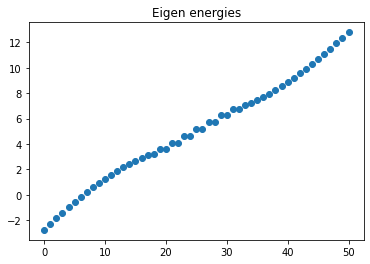

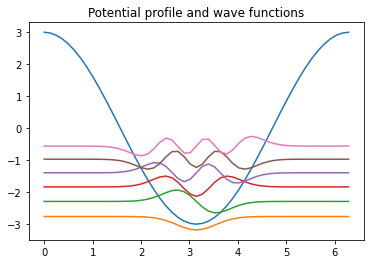

In [21]:
# plotting

plt.figure()
plt.plot(wa, 'o')
plt.title('Eigen energies')
plt.figure()
plt.plot(phi, poten.detach().numpy().diagonal())
n_eig_plot = 6
plt.plot(phi, va[:, :n_eig_plot]+wa[:n_eig_plot][None, :n_eig_plot])
plt.title('Potential profile and wave functions')
# plt.show()